In [22]:
import pandas as pd
import re

In [23]:
# # Use smaller list of words
# import english_words
# words = english_words.english_words_lower_alpha_set
# words = set(words)

# Use big list of words
with open('wordsbig.txt') as f:
    lines = f.readlines()
words = set([line.strip() for line in lines])

with open('nameslast.txt') as f:
    lines = f.readlines()
nameslast = set([line.strip() for line in lines])

with open('namesfirst.txt') as f:
    lines = f.readlines()
namesfirst = set([line.strip() for line in lines])

print(len(words))
words = (words-nameslast)-namesfirst
print(len(words))

words = list(words)
words.sort()
with open('words-no-names.txt', 'w') as f:
    f.write('\n'.join(words))
    
words = set(words)

370103
363637


In [ ]:
word = 'andorand || == */and or or*andor'
keep = [w for w in re.split('[^a-zA-Z]', word) if len(w)>0 and w not in words]
keep

# TODO

* words.txt - English words dictionary
* namesfirst/nameslast.txt - English names dictionary
* Remove English words\names and everything except letters

Note: We don't want to remove everything except names because we likely have some unusual names that are not in the names dictionary.

In [ ]:
lines = ''
with open('nameslast.txt') as f:
    lines = f.readlines()
names = [line.split(',')[0].strip().lower() for line in lines]
with open('nameslast.txt', 'w') as f:
    f.write('\n'.join(names))

In [ ]:
lines = ''
with open('namesfirst.txt') as f:
    lines = f.readlines()
names = [name.strip().lower() for name in lines if len(name.strip())>0]
with open('namesfirst.txt', 'w') as f:
    f.write('\n'.join(names))

In [ ]:
'recitations' in words

In [ ]:
lines = ''
with open('heads/heads.txt') as f:
    lines = f.readlines()

regex = re.compile('____|\*\*\*\*')#re.sub(r'(?is)</html>.+', '</html>', article)
regex2 = re.compile('#|\'|\d|=|:|\"|@|,|assn|assignment|task', flags=re.IGNORECASE)
id2names = {}
joined = ''.join(lines)
arr = ['100'+s for s in joined.split('____100')][1:]
for entry in arr:
    earr = entry.split('\n')
    subjectID = earr[0].split()[0]
    entries = set([])
    for line in earr[1:]:
        line = re.sub(regex2, '', line).strip()
#         line = ' '.join([w for w in re.split('[^a-zA-Z]', line) if len(w.lower().strip())>0 and w.lower().strip() not in words])
        line = ' '.join([w.lower().strip() for w in re.split('[^a-zA-Z]', line) if len(w.lower().strip())>0])
        if len(line) > 0:
            entries.add(line)
    if subjectID in id2names.keys():
        id2names[subjectID].update(entries)
    else:
        id2names[subjectID] = entries

lines = []
for key in id2names.keys():
#     print(key)
    lines.append(key)
    for val in id2names[key]:
#         print(f'  {val}')
        lines.append(f'  {val}')

with open('heads/heads-stripped.txt', 'w') as f:
    f.write('\n'.join(lines))

In [21]:
def add_to_ascii(s, add):
    ch = [c+add for c in bytes(s, 'utf-8')]
    return ''.join([str(chr(c)) for c in ch])

# zoom
s = 'Ebof!Sbtnvttfo!.!Bttjho7!.!ubtl2/qz'
print(add_to_ascii(s, -1)) # Student 16 confirmed
s = 'Kblf!Nvsepdl!.!Bttjho:!.!ubtl3/qz'
print(add_to_ascii(s, -1)) # Student33 confirmed
s = 'Szbo!Hvcmfs!.!Bttjho:!.!ubtl2/qz'
print(add_to_ascii(s, -1)) # Student39 confirmed

s = 'Szbo!Hvcmfs!.!Bttjho21!.!kvol/qz'
print(add_to_ascii(s, -1))
s = 'Ibssjtpo!Xzoo!.!Bttjho22!.!Ubtl2/qz'
print(add_to_ascii(s, -1))


Dane Rasmussen - Assign6 - task1.py
Jake Murdock - Assign9 - task2.py
Ryan Gubler - Assign9 - task1.py
Ryan Gubler - Assign10 - junk.py
Harrison Wynn - Assign11 - Task1.py


In [2]:
import pandas as pd

In [15]:
df = pd.read_csv('data-fall2021-deidentified/keystrokes-new.csv')

In [16]:
df[df.SubjectID == 'Student16'].to_csv('test.csv')

In [ ]:
df.to_csv('data-fall2021-deidentified/keystrokes1.csv', index=False)

False
False
True
True
True
False
True
True
True
False


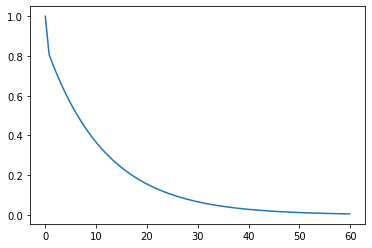

In [62]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np

# Given a number of minutes x since the last keystroke,
# returns the probability that the student was on task.
# Uses the model from Hart et al, ITiCSE 2022.
def p(x):
    if x < .75:
        m = -(1-0.8072438106027864)/.75
        return m*x+1
    Q = 6604
    B = -4.99
    M = 0.01
    v = 58.32
    return 1 / (1+Q*math.e**(-B*(x-M)))**(1/v)

# Given a number of minutes x since the last keystroke,
# returns whether the student was on task. Uses p(x)
# to get the probability then rolls the dice to see if
# we count the student as being on task or not.
def on_task(x):
    return random.random() < p(x)

# Example: about half of the time the student will be on task
# after 3 minutes
for i in range(10):
    print(on_task(3))

X = [m for m in np.arange(0,60,.1)]
y = [p(x) for x in X]
plt.plot(X, y)

# SIGCSE presentation charts

In [150]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np

# Given a number of minutes x since the last keystroke,
# returns the probability that the student was on task.
# Uses the model from Hart et al, ITiCSE 2022.
def p(x):
    if x < .75:
        m = -(1-0.8072438106027864)/.75
        return m*x+1
    Q = 6604
    B = -4.99
    M = 0.01
    v = 58.32
    return 1 / (1+Q*math.e**(-B*(x-M)))**(1/v)

# Given a number of minutes x since the last keystroke,
# returns whether the student was on task. Uses p(x)
# to get the probability then rolls the dice to see if
# we count the student as being on task or not.
def on_task(x):
    if x <= 0:
        return False
    if x > 60:
        return False
    return random.random() < p(x)

# # Example: about half of the time the student will be on task
# # after 3 minutes
# for i in range(10):
#     print(on_task(3))

# X = [m for m in np.arange(0,60,.1)]
# y = [p(x) for x in X]
# plt.plot(X, y)

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df_orig = pd.read_csv('data-fall2021/keystrokes.csv')

In [68]:
df = df_orig.copy()
df = df[df.EventType == 'File.Edit']
df['elapsed'] = df.ClientTimestamp - df.shift(1).ClientTimestamp
df['ID'] = df.SubjectID + df.AssignmentID + df.CodeStateSection
df.loc[df.ID != df.shift(1).ID, 'elapsed'] = 0

In [87]:
f = 60*1000
mp = {'A':1*f, 'B':3*f, 'C':30*f, 'D':60*f}
for a,b in mp.items():
    print(a, b)

A 60000
B 180000
C 1800000
D 3600000


In [151]:
(df.elapsed/(1000*60)).apply(on_task)#lambda x : on_taskFalse if (x <= 0.000001 or x > 1000) else on_task(x))

0          False
1           True
3           True
6           True
8           True
           ...  
2088851     True
2088853     True
2088855     True
2088857     True
2088859     True
Name: elapsed, Length: 971220, dtype: bool

In [152]:
test = df.groupby(['SubjectID', 'AssignmentID']).agg({'elapsed':'sum'}).reset_index()
test.elapsed = test.elapsed/(1000*60*60)
for a,b in mp.items():
    test2 = df.copy()
    test2 = test2[test2.elapsed < b]
    test2 = test2.groupby(['SubjectID', 'AssignmentID']).agg({'elapsed':'sum'}).reset_index()
    test2.elapsed = test2.elapsed/(1000*60*60)
    test[a] = test2.elapsed

test2 = df.copy()
test2 = test2[(test2.elapsed/(60*1000)).apply(on_task)]
test2 = test2.groupby(['SubjectID', 'AssignmentID']).agg({'elapsed':'sum'}).reset_index()
test2.elapsed = test2.elapsed/(1000*60*60)
test['Ours'] = test2.elapsed
    
    
# df.groupby(['SubjectID', 'AssignmentID']).agg({'elapsed':'sum'}).reset_index()
test = test.reset_index()
test = test[['SubjectID', 'AssignmentID', 'elapsed', 'A', 'B', 'C', 'D', 'Ours']]
test.columns = ['SubjectID', 'AssignmentID', 'X', '< 1', '< 3', '< 30', '< 60', 'Model']

In [153]:
test.head()

,SubjectID,AssignmentID,X,< 1,< 3,< 30,< 60,Model
0,Student1,Assign10,0.029404,0.029404,0.029404,0.029404,0.029404,0.029404
1,Student1,Assign12,1.211849,0.439374,0.721544,1.211849,1.211849,1.124842
2,Student1,Assign13,6.241282,0.515024,0.877867,1.994802,1.994802,1.186802
3,Student1,Assign6,34.466337,1.173921,1.688196,3.671382,4.466881,1.978273
4,Student1,Assign7,47.178476,0.778018,1.229093,2.319680,2.984629,1.429523


In [154]:
test = test.set_index(['SubjectID','AssignmentID']).stack().reset_index()
test.columns = ['SubjectID', 'AssignmentID', 'test', 'elapsed']
test.head()

,SubjectID,AssignmentID,test,elapsed
0,Student1,Assign10,X,0.029404
1,Student1,Assign10,< 1,0.029404
2,Student1,Assign10,< 3,0.029404
3,Student1,Assign10,< 30,0.029404
4,Student1,Assign10,< 60,0.029404


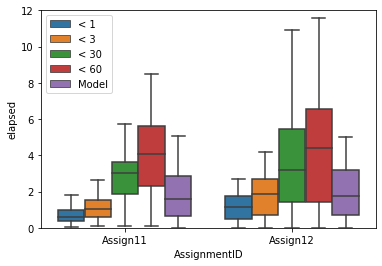

In [155]:
toplot = test
toplot = toplot[test.test != 'X']
# toplot = toplot[test.AssignmentID.isin(['Assign11', 'Assign12', 'Assign13'])]

sns.boxplot(hue = 'test', x="AssignmentID", y="elapsed", data=toplot, horder=['Assign11', 'Assign12'])
plt.ylim([0,12])
plt.legend(title='')
plt.savefig('compare.pdf', bbox_inches='tight')

sns.boxplot(hue = 'test', x="AssignmentID", y="elapsed", data=toplot, order=['Assign11', 'Assign12'])
plt.ylim([0,12])
plt.legend(title='')
plt.savefig('compare.pdf', bbox_inches='tight')

In [134]:
test.groupby(['AssignmentID', 'test']).median()

elapsed
AssignmentID test            
Assign10     < 1     0.033561
             < 3     0.073137
             < 30    0.355360
             < 60    0.661949
             X      24.615897
Assign11     < 1     0.597581
             < 3     1.010097
             < 30    3.051294
             < 60    4.057523
             X      43.104867
Assign12     < 1     1.172499
             < 3     1.865046
             < 30    3.167792
             < 60    4.381275
             X      47.581947
Assign13     < 1     0.337609
             < 3     0.544281
             < 30    0.965614
             < 60    1.671109
             X     108.911594
Assign6      < 1     1.855297
             < 3     2.746749
             < 30    4.478458
             < 60    5.270868
             X      72.588427
Assign7      < 1     1.791550
             < 3     2.599864
             < 30    5.199969
             < 60    5.901218
             X      65.161257
Assign8      < 1     1.115235
             < 3     1.857733
             < 30    3.674933
             < 60    4.508832
             X      57.526988
Assign9      < 1     1.276538
             < 3     1.857057
             < 30    4.725758
             < 60    6.371405
             X      81.420477

In [96]:
test.columns

Index(['index', 'SubjectID', 'AssignmentID', 'elapsed', 'A', 'B', 'C', 'D'], dtype='object')

In [98]:
display(test.head())
# test.melt(id_vars=['index', 'SubjectID', 'AssignmentID'], 
#           var_name='test', 
#           value_name='A')


,SubjectID,AssignmentID,X,A,B,C,D
0,Student1,Assign10,0.029404,0.029404,0.029404,0.029404,0.029404
1,Student1,Assign12,1.211849,0.439374,0.721544,1.211849,1.211849
2,Student1,Assign13,6.241282,0.515024,0.877867,1.994802,1.994802
3,Student1,Assign6,34.466337,1.173921,1.688196,3.671382,4.466881
4,Student1,Assign7,47.178476,0.778018,1.229093,2.319680,2.984629


,SubjectID,AssignmentID,level_2,0
0,Student1,Assign10,X,0.029404
1,Student1,Assign10,A,0.029404
2,Student1,Assign10,B,0.029404
3,Student1,Assign10,C,0.029404
4,Student1,Assign10,D,0.029404
...,...,...,...,...
1300,Student9,Assign9,X,145.293376
1301,Student9,Assign9,A,4.770254
1302,Student9,Assign9,B,6.937944
1303,Student9,Assign9,C,10.995313
